# Primeira etapa - Simulações numéricas essenciais.

In [2]:
import math
from cmath import *
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt

## Constantes

In [45]:
R1 = R2 = 0.5
L1 = L2 = 0.4524514132328006e-3
C1 = C2 = 4.7e-6
k = 0.1
RC = 400
UF = 5

## Cálculos e simulações

In [46]:
m = k * math.sqrt(L1 * L2)
w = 1 / (math.sqrt(L1 * C1))
f_res = w / (2 * pi)
f_res

3451.32

In [47]:
def CalcularTransformador(Uf, Rc, w, k):
    m = k * math.sqrt(L1 * L2)
    XL1 = w * L1 * 1j
    XC1 = 1/(w * C1 * 1j)
    XM = m * w * 1j
    XL2 = w * L2 * 1j
    XC2 = 1 / (w * C2 * 1j)
    Zrc_c2 = (Rc * XC2) / (Rc + XC2)
    Z = np.array([[R1 + XL1 + XC1, -XM], [-XM, XL2 + R2 + Zrc_c2]])
    V = np.array([Uf, 0])
    i = np.dot(linalg.inv(Z), V)
    return i[0], i[1]

Freq onde o I1 e max: 3631.3388338833884


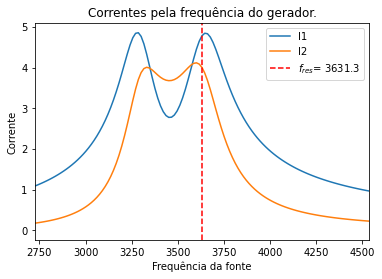

In [48]:
i1_list = []
i2_list = []
freqs = np.linspace(1, 150_000, 10_000)
k = 0.1
for freq in freqs:
    w = 2 * pi * freq
    i1, i2 = CalcularTransformador(UF, RC, w, k)
    i1_list.append(i1)
    i2_list.append(i2)

index_imax = i1_list.index(max(i1_list))
f_res = freqs[index_imax]
print(f"Freq onde o I1 e max: {f_res}")

ponto_ressonancia = (f_res, max(np.abs(i1_list)))

plt.plot(freqs, np.abs(i1_list), label='I1')
plt.plot(freqs, np.abs(i2_list), label='I2')
plt.axvline(f_res, color='red', linestyle='dashed', label=f'$f_{{res}}$= {f_res:.1f}')
plt.title("Correntes pela frequência do gerador.")
plt.xlabel('Frequência da fonte')
plt.ylabel("Corrente")
plt.legend()
plt.xlim(f_res - 0.25 * f_res, f_res + 0.25 * f_res)
plt.show()

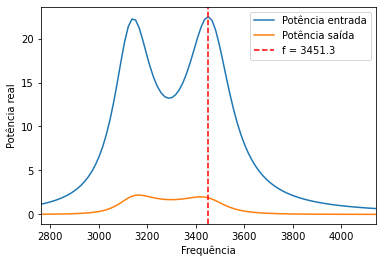

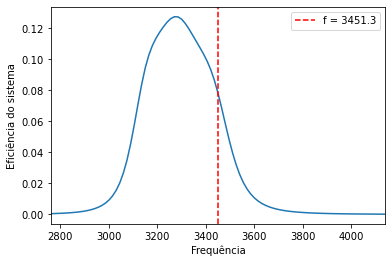

In [32]:
p_1 = []
p_2 = []

for i, freq in enumerate(freqs):
    p_1.append((10 * i1_list[i].conjugate()) / 2)
    z_c2 = 1 / (freq * 2 * pi * C2 * 1j)
    z_rcc2 = (z_c2 * RC) / (z_c2 + RC)
    u_rcc2 = z_rcc2 * i2_list[i]
    i_rc = u_rcc2 / RC 
    p_2.append((RC * i_rc * i_rc.conjugate()) / 2)

eficiencia = [p_2[i] / p_1[i] for i in range(0, len(p_1))]
f = freqs[p_1.index(max(p_1))]

plt.plot(freqs, np.real(p_1), label='Potência entrada')
plt.plot(freqs, np.real(p_2), label='Potência saída')
plt.axvline(f, color='red', linestyle='dashed', label=f'f = {f:.1f}')
plt.xlabel("Frequência")
plt.ylabel("Potência real")
plt.xlim(f - 0.2*f, f + 0.2*f)
plt.legend()
plt.show()

plt.plot(freqs, np.real(eficiencia))
plt.axvline(f, color='red', linestyle='dashed', label=f'f = {f:.1f}')
plt.legend()
plt.xlabel("Frequência")
plt.ylabel("Eficiência do sistema")
plt.xlim(f - 0.2*f, f + 0.2*f)
plt.show()

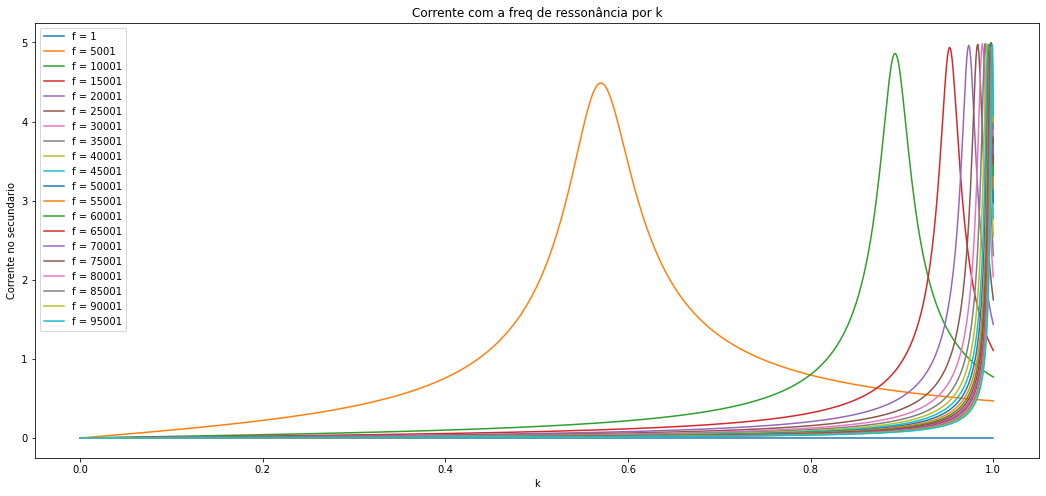

In [33]:
fig = plt.figure(figsize=(18, 8))
k_space = np.linspace(0, 1, 1000)
for f in range(1, 100_000, 5_000):
    i_2 = []
    for k in k_space:
        w = 2 * pi * f
        i1, i2 = CalcularTransformador(UF, RC, w, k)

        i_2.append(i2)
    plt.plot(k_space, np.abs(i_2), label=f"f = {f}")

plt.title("Corrente com a freq de ressonância por k")
plt.xlabel("k")
plt.ylabel("Corrente no secundario")
plt.legend(loc='upper left')
plt.show()

## Atualizando o modelo para onda quadrada
$$V1(t) = 2 \cdot \pi \cdot V_p \cdot cos(wt)$$

In [ ]:
def CalcularTransformador(Uf, Rc, w, k):
    m = k * math.sqrt(L1 * L2)
    XL1 = w * L1 * 1j
    XC1 = 1/(w * C1 * 1j)
    XM = m * w * 1j
    XL2 = w * L2 * 1j
    XC2 = 1 / (w * C2 * 1j)
    Zrc_c2 = (Rc * XC2) / (Rc + XC2)
    ufq = 2 * np.pi * Uf 
    Z = np.array([[R1 + XL1 + XC1, -XM], [-XM, XL2 + R2 + Zrc_c2]])
    V = np.array([ufq, 0])
    i = np.dot(linalg.inv(Z), V)
    return i[0], i[1]

In [40]:
w = math.sqrt(1 / (0.5e-3 * 4.7e-6))
L = 1/((2*np.pi*3451.32)**2*4.7e-6)
L*1000

0.4524514132328006